<a href="https://colab.research.google.com/github/8Raouf24/PFE/blob/master/Filtrage_S%C3%A9mantique.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget http://deepyeti.ucsd.edu/jianmo/amazon/categoryFilesSmall/Musical_Instruments_5.json.gz

--2020-08-28 14:21:50--  http://deepyeti.ucsd.edu/jianmo/amazon/categoryFilesSmall/Musical_Instruments_5.json.gz
Resolving deepyeti.ucsd.edu (deepyeti.ucsd.edu)... 169.228.63.50
Connecting to deepyeti.ucsd.edu (deepyeti.ucsd.edu)|169.228.63.50|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 39356138 (38M) [application/octet-stream]
Saving to: ‘Musical_Instruments_5.json.gz’

Musical_Instruments 100%[===================>]  37.53M  15.0MB/s    in 2.5s    

2020-08-28 14:21:53 (15.0 MB/s) - ‘Musical_Instruments_5.json.gz’ saved [39356138/39356138]



In [ ]:
import gzip
import json
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, GRUCell, GRU, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np 
import matplotlib.pyplot as plt


def parse(path):
    g = gzip.open(path, 'r')
    for l in g:
        d = json.loads(l)
        yield d
data = parse("Musical_Instruments_5.json.gz")
labels = []
reviews = []
for i in range(10000):
  L = next(data)
  if "reviewText" in L :
    if "overall" in L :
      labels.append(L["overall"])
      reviews.append(L["reviewText"])

In [ ]:
print(labels)
print(reviews)

#Quelque hyper-parmas
train_rate = 0.2
seq_len = 60
max_words = 1000
padding_mode = "post"
oov_word = "<OOV>"
nb_reviews = len(reviews)

[5.0, 5.0, 5.0, 4.0, 1.0, 4.0, 5.0, 4.0, 5.0, 3.0, 1.0, 4.0, 5.0, 5.0, 5.0, 5.0, 2.0, 2.0, 4.0, 4.0, 5.0, 5.0, 3.0, 4.0, 5.0, 3.0, 4.0, 5.0, 4.0, 1.0, 3.0, 4.0, 3.0, 2.0, 5.0, 5.0, 5.0, 5.0, 4.0, 3.0, 4.0, 5.0, 4.0, 3.0, 4.0, 5.0, 3.0, 1.0, 5.0, 1.0, 5.0, 3.0, 4.0, 1.0, 2.0, 5.0, 2.0, 1.0, 2.0, 5.0, 5.0, 4.0, 4.0, 5.0, 3.0, 4.0, 5.0, 5.0, 5.0, 2.0, 5.0, 3.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 1.0, 4.0, 5.0, 5.0, 5.0, 5.0, 4.0, 5.0, 5.0, 4.0, 5.0, 3.0, 5.0, 5.0, 5.0, 5.0, 4.0, 4.0, 5.0, 5.0, 4.0, 5.0, 5.0, 4.0, 4.0, 4.0, 4.0, 5.0, 5.0, 5.0, 5.0, 3.0, 5.0, 5.0, 5.0, 5.0, 5.0, 3.0, 5.0, 4.0, 5.0, 3.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 4.0, 5.0, 5.0, 4.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 4.0, 1.0, 5.0, 3.0, 5.0, 5.0, 4.0, 4.0, 4.0, 5.0, 5.0, 5.0, 5.0, 1.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 3.0, 5.0, 5.0, 5.0, 5.0, 5.0, 3.0, 5.0, 5.0, 5.0, 5.0, 4.0, 5.0, 5.0, 4.0, 4.0, 5.0, 5.0, 5.0, 3.0, 5.0, 5.0, 5.0, 5.0, 5.0, 4.0, 4.0, 5.0, 4.0, 5.0, 1.0, 5.0, 5.0, 5.0,

In [ ]:
training_reviews = reviews[int(nb_reviews*train_rate):]
testing_reviews = reviews[:int(nb_reviews*train_rate)]
training_labels = np.array(labels[int(nb_reviews*train_rate):])
testing_labels = np.array(labels[:int(nb_reviews*train_rate)])


In [ ]:
tokenizer = Tokenizer(num_words=1000,oov_token=oov_word,lower=True)
tokenizer.fit_on_texts(training_reviews)

training_sequences = tokenizer.texts_to_sequences(training_reviews)
testing_sequences = tokenizer.texts_to_sequences(testing_reviews)

training_sequences = pad_sequences(training_sequences,maxlen=seq_len).astype("uint8")
testing_sequences = pad_sequences(testing_sequences,maxlen=seq_len).astype("float16")

print(training_sequences.shape)
print(testing_sequences.shape)
print(type(training_sequences[0]))

print(training_labels.shape)

(8000, 60)
(2000, 60)
<class 'numpy.ndarray'>
(8000,)


In [ ]:
model = Sequential()
model.add(Embedding(max_words, 100, input_length=seq_len))
model.add(Bidirectional(LSTM(60)))
model.add(Dense(1, activation='linear'))
adam = Adam(lr=0.1e-6)
model.compile(loss='mse', optimizer=adam)
print(model.summary())

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_28 (Embedding)     (None, 60, 100)           100000    
_________________________________________________________________
bidirectional_33 (Bidirectio (None, 120)               77280     
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 121       
Total params: 177,401
Trainable params: 177,401
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
history = model.fit(training_sequences,training_labels,epochs=200,validation_data=(testing_sequences,testing_labels))

Epoch 1/200
250/250 [==============================] - 19s 77ms/step - loss: 0.7186 - val_loss: 0.7853
Epoch 2/200
250/250 [==============================] - 15s 62ms/step - loss: 0.7184 - val_loss: 0.7852
Epoch 3/200
250/250 [==============================] - 16s 63ms/step - loss: 0.7183 - val_loss: 0.7850
Epoch 4/200
250/250 [==============================] - 16s 64ms/step - loss: 0.7181 - val_loss: 0.7848
Epoch 5/200
250/250 [==============================] - 15s 62ms/step - loss: 0.7180 - val_loss: 0.7846
Epoch 6/200
250/250 [==============================] - 15s 61ms/step - loss: 0.7178 - val_loss: 0.7844
Epoch 7/200
250/250 [==============================] - 15s 62ms/step - loss: 0.7177 - val_loss: 0.7842
Epoch 8/200
250/250 [==============================] - 16s 63ms/step - loss: 0.7175 - val_loss: 0.7840
Epoch 9/200
250/250 [==============================] - 15s 61ms/step - loss: 0.7174 - val_loss: 0.7839
Epoch 10/200
250/250 [==============================] - 15s 61ms/step - l

KeyboardInterrupt: ignored

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
y_predicted = model.predict(testing_sequences)
rms = sqrt(mean_squared_error(testing_labels, y_predicted))
print(rms)

0.8799065076310538


In [ ]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  

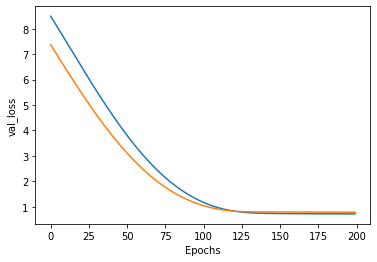

In [ ]:
plot_graphs(history,"loss")
plot_graphs(history,"val_loss")

In [ ]:
model = Sequential()
model.add(Embedding(max_words, 100, input_length=seq_len))
model.add(Bidirectional(LSTM(60)))
model.add(Dense(1, activation='linear'))
adam = Adam(lr=0.1e-2)
model.compile(loss='mse', optimizer=adam)
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 60, 100)           100000    
_________________________________________________________________
bidirectional_4 (Bidirection (None, 120)               77280     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 121       
Total params: 177,401
Trainable params: 177,401
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
history = model.fit(training_sequences,training_labels,epochs=10,validation_data=(testing_sequences,testing_labels))

Epoch 1/10
250/250 [==============================] - 16s 64ms/step - loss: 1.6827 - val_loss: 0.7510
Epoch 2/10
250/250 [==============================] - 15s 61ms/step - loss: 0.6651 - val_loss: 0.7103
Epoch 3/10
250/250 [==============================] - 15s 62ms/step - loss: 0.6411 - val_loss: 0.6928
Epoch 4/10
250/250 [==============================] - 15s 62ms/step - loss: 0.6157 - val_loss: 0.6914
Epoch 5/10
250/250 [==============================] - 15s 61ms/step - loss: 0.5867 - val_loss: 0.7159
Epoch 6/10
250/250 [==============================] - 15s 61ms/step - loss: 0.5693 - val_loss: 0.6755
Epoch 7/10
250/250 [==============================] - 16s 62ms/step - loss: 0.5443 - val_loss: 0.7061
Epoch 8/10
250/250 [==============================] - 15s 62ms/step - loss: 0.5250 - val_loss: 0.6865
Epoch 9/10
250/250 [==============================] - 15s 62ms/step - loss: 0.5068 - val_loss: 0.6819
Epoch 10/10
250/250 [==============================] - 15s 62ms/step - loss: 0.488

0.8547558166412136


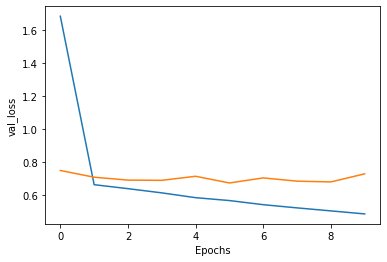

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
y_predicted = model.predict(testing_sequences)
rms = sqrt(mean_squared_error(testing_labels, y_predicted))
print(rms)
plot_graphs(history,"loss")
plot_graphs(history,"val_loss")